In [11]:
from annoy import AnnoyIndex
def buildAnnoyIndex(data,metric="angular",ntrees=5):
    f = data.shape[1]
    idx = AnnoyIndex(f,metric)  
    for i,d in enumerate(data):
        idx.add_item(i, d)
    idx.build(ntrees) 
    return idx

In [1]:
import pandas as pd

data=pd.read_csv("lhc_event.csv")

annoy_idx=buildAnnoyIndex(data[["x","y","z"]].values)

In [67]:
hit_id=467
Nb_neighbors=20
bucket_idx=annoy_idx.get_nns_by_item(hit_id,Nb_neighbors)

In [68]:
from collections import Counter
Counter(data.iloc[bucket_idx].particle_id)

Counter({774646073942605824: 16, 945764717840826368: 3, 409834231879958528: 1})

In [69]:
len(data[data.particle_id==774646073942605824])

16

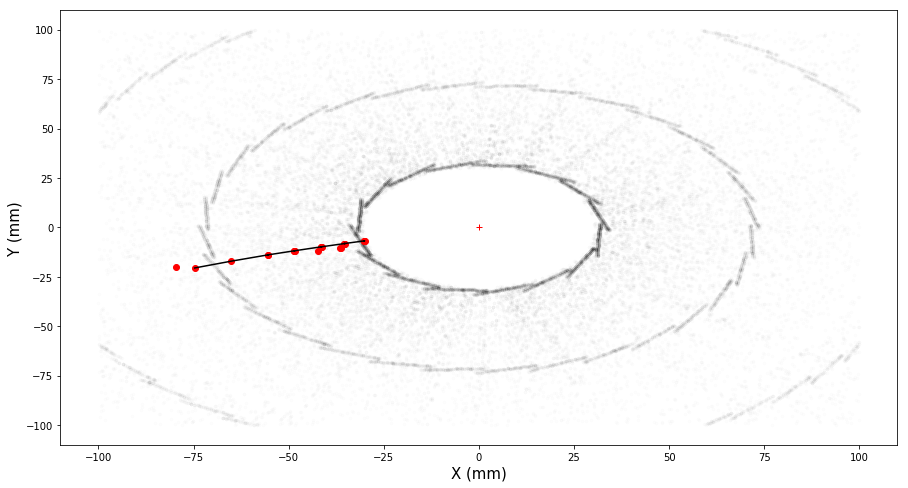

In [80]:
import matplotlib.pyplot as plt
bucket=data.iloc[bucket_idx]
plt.figure(figsize=(15,8))
plt.plot(0,0,"r+")
plt.plot(data[(abs(data.y)<100) & (abs(data.x)<100)].x,data[(abs(data.y)<100) & (abs(data.x)<100)].y,"k.",alpha=0.007)

plt.plot(bucket.x,bucket.y,"ro")
plt.plot(data[data.particle_id==774646073942605824].x,data[data.particle_id==774646073942605824].y,"k-")
plt.xlabel("X (mm)" , fontsize=15)
plt.ylabel("Y (mm)" , fontsize=15)

plt.show()

In [99]:
Nb_neighbors=20
largest_particle_size=[]
for i in data.index.values:
    bucket_idx=annoy_idx.get_nns_by_item(i,Nb_neighbors)
    largest_particle_size.append(Counter(data.iloc[bucket_idx].particle_id).most_common(1)[0][1])

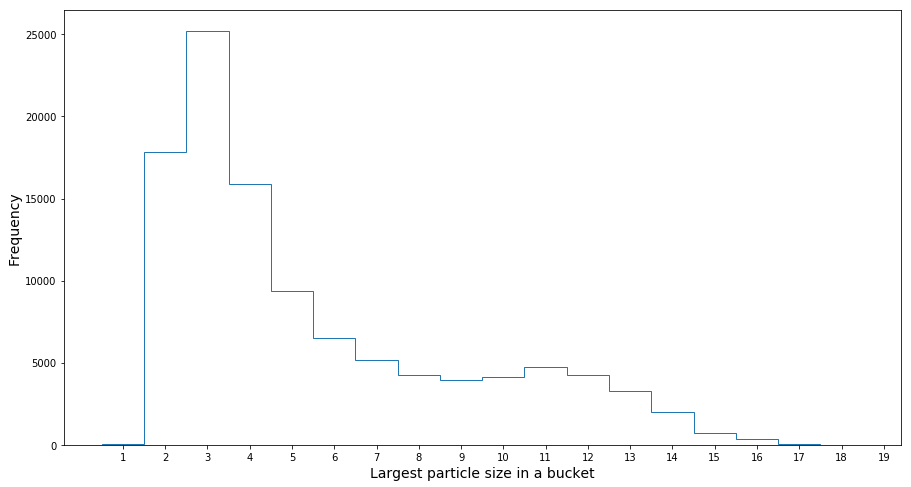

In [109]:
import numpy as np

plt.figure(figsize=(15,8))
plt.hist(largest_particle_size,histtype="step",bins=np.arange(1,20,1),align="left")

plt.xlabel("Largest particle size in a bucket",fontsize=14)
plt.ylabel("Frequency",fontsize=14)

plt.xticks(np.arange(1,20,1))
plt.show()

In [ ]:
Nb_neighbors=50
largest_particle_size_50=[]
for i in data.index.values:
    bucket_idx=annoy_idx.get_nns_by_item(i,Nb_neighbors)
    largest_particle_size_50.append(Counter(data.iloc[bucket_idx].particle_id).most_common(1)[0][1])

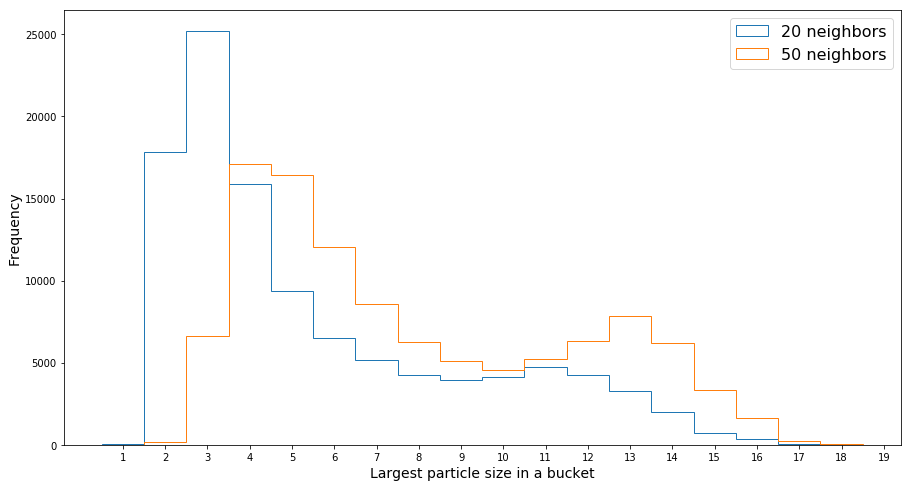

In [104]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,8))
plt.hist(largest_particle_size,histtype="step",bins=np.arange(1,20,1),align="left",label="20 neighbors")
plt.hist(largest_particle_size_50,histtype="step",bins=np.arange(1,20,1),align="left",label="50 neighbors")

plt.xlabel("Largest particle size in a bucket",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.legend(fontsize=16)
plt.xticks(np.arange(1,20,1))
plt.show()

In [107]:
%timeit [annoy_idx.get_nns_by_item(i,50) for i in data.index.values[:10000]]

392 ms ± 5.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
